# BLG454E Final Exam: Computer Assignment

**Author:** Hazar Utku Sözer   
**Number:** 150220754    
**Date:** 24/06/2025

## Links

- **Code & Notebook:** https://github.com/your-username/BLG454E-FinalExam  
- **Dataset Generation:** runs in the “2. Data Generation & Splitting” cell of this notebook  

## 1. Setup & Imports

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Random seed (454 from course code, 754 from my student number)
seed = 454754

## 2. Data Generation & Splitting

In [148]:
# D1: two linearly separable Gaussian blobs
X1, y1 = make_blobs(
    n_samples=200,
    centers=[(2, 2), (-2, -2)],
    cluster_std=0.5,
    random_state=seed
)
# Randomly pick 10 vectors per class for test set T1
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1,
    test_size=0.10,       # 10% of 200
    stratify=y1,          # equal class
    random_state=seed
)

# D2: two overlapping Gaussian blobs
X2, y2 = make_blobs(
    n_samples=200,
    centers=[(0, 0), (1, 1)],
    cluster_std=1.5,
    random_state=seed
)
# Randomly pick 10 vectors per class for test set T2
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2,
    test_size=0.10,       # 10% of 200
    stratify=y2,
    random_state=seed
)

## 3. Visualize D1 & D2

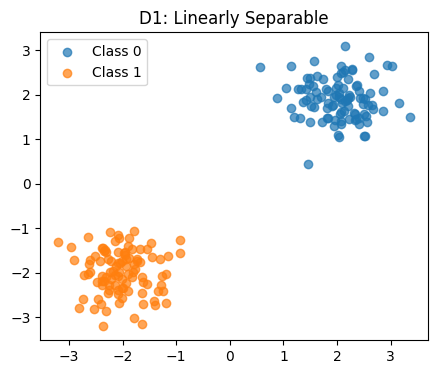

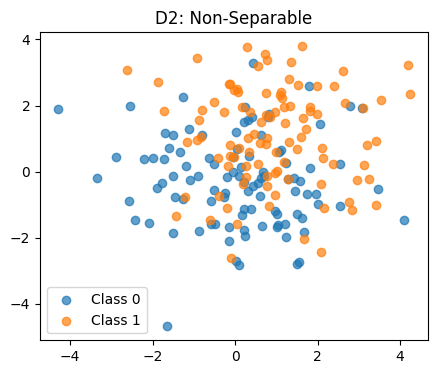

In [149]:
plt.figure(figsize=(5,4))
plt.scatter(X1[y1==0,0], X1[y1==0,1], label='Class 0', alpha=0.7)
plt.scatter(X1[y1==1,0], X1[y1==1,1], label='Class 1', alpha=0.7)
plt.title('D1: Linearly Separable')
plt.legend()
plt.show()

plt.figure(figsize=(5,4))
plt.scatter(X2[y2==0,0], X2[y2==0,1], label='Class 0', alpha=0.7)
plt.scatter(X2[y2==1,0], X2[y2==1,1], label='Class 1', alpha=0.7)
plt.title('D2: Non-Separable')
plt.legend()
plt.show()

## 4. Hard‑Margin SVM on D1

Hard-Margin SVM on D1 → Training acc on D1: 1.00
Hard-Margin SVM on D1 →   Test acc on T1: 1.00


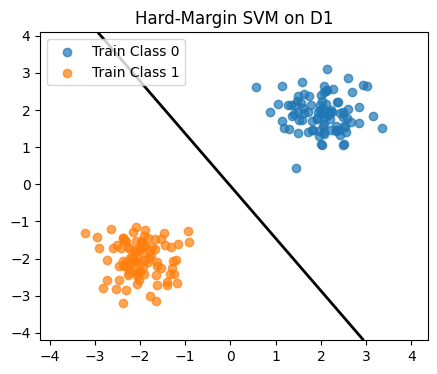

In [150]:
# Linear SVM with large C zero slack (hard margin)
svc1 = SVC(C=1e6, kernel='linear', random_state=seed)
svc1.fit(X1_train, y1_train)

# Compute accuracies:
train_acc1 = svc1.score(X1_train, y1_train)  # performance on D1 training split
test_acc1  = svc1.score(X1_test,  y1_test)   # performance on T1

print(f"Hard-Margin SVM on D1 → Training acc on D1: {train_acc1:.2f}")
print(f"Hard-Margin SVM on D1 →   Test acc on T1: {test_acc1:.2f}")

# Plot the decision boundary
xx, yy = np.meshgrid(
    np.linspace(X1[:,0].min()-1, X1[:,0].max()+1, 300),
    np.linspace(X1[:,1].min()-1, X1[:,1].max()+1, 300)
)
Z1 = svc1.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5,4))
plt.contour(xx, yy, Z1, levels=[0], linewidths=2, colors='k')
plt.scatter(X1_train[y1_train==0,0], X1_train[y1_train==0,1], label='Train Class 0', alpha=0.7)
plt.scatter(X1_train[y1_train==1,0], X1_train[y1_train==1,1], label='Train Class 1', alpha=0.7)
plt.title('Hard-Margin SVM on D1')
plt.legend()
plt.show()

## 5. Soft‑Margin SVM on D2

Soft-Margin SVM on D2 → Training acc on D2: 0.74
Soft-Margin SVM on D2 →   Test acc on T2: 0.55


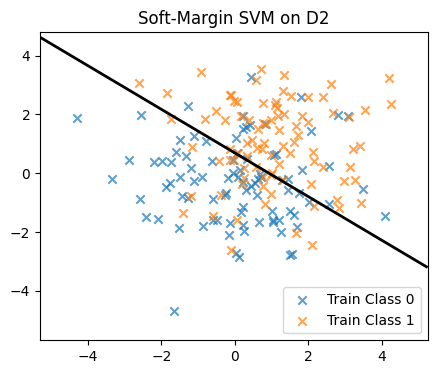

In [151]:
# Linear SVM with C=1.0 with slack (soft margin)
svc2 = SVC(C=1.0, kernel='linear', random_state=seed)
svc2.fit(X2_train, y2_train)

# Compute accuracies
train_acc2 = svc2.score(X2_train, y2_train)  # performance on D2 training split
test_acc2  = svc2.score(X2_test,  y2_test)   # performance on T2

print(f"Soft-Margin SVM on D2 → Training acc on D2: {train_acc2:.2f}")
print(f"Soft-Margin SVM on D2 →   Test acc on T2: {test_acc2:.2f}")

# Plot the decision boundary
xx2, yy2 = np.meshgrid(
    np.linspace(X2[:,0].min()-1, X2[:,0].max()+1, 300),
    np.linspace(X2[:,1].min()-1, X2[:,1].max()+1, 300)
)
Z2 = svc2.decision_function(np.c_[xx2.ravel(), yy2.ravel()]).reshape(xx2.shape)

plt.figure(figsize=(5,4))
plt.contour(xx2, yy2, Z2, levels=[0], linewidths=2, colors='k')
plt.scatter(X2_train[y2_train==0,0], X2_train[y2_train==0,1], label='Train Class 0', alpha=0.7, marker='x')
plt.scatter(X2_train[y2_train==1,0], X2_train[y2_train==1,1], label='Train Class 1', alpha=0.7, marker='x')
plt.title('Soft-Margin SVM on D2')
plt.legend()
plt.show()

## 6. Two‑Layer MLP on D1 & D2

In [152]:
# MLP on D1
mlp1 = MLPClassifier(hidden_layer_sizes=(10,), solver='lbfgs',
                     max_iter=1000, random_state=seed)
mlp1.fit(X1_train, y1_train)
train_acc_mlp1 = mlp1.score(X1_train, y1_train)
test_acc_mlp1  = mlp1.score(X1_test,  y1_test)

# MLP on D2
mlp2 = MLPClassifier(hidden_layer_sizes=(10,), solver='lbfgs',
                     max_iter=1000, random_state=seed)
mlp2.fit(X2_train, y2_train)
train_acc_mlp2 = mlp2.score(X2_train, y2_train)
test_acc_mlp2  = mlp2.score(X2_test,  y2_test)

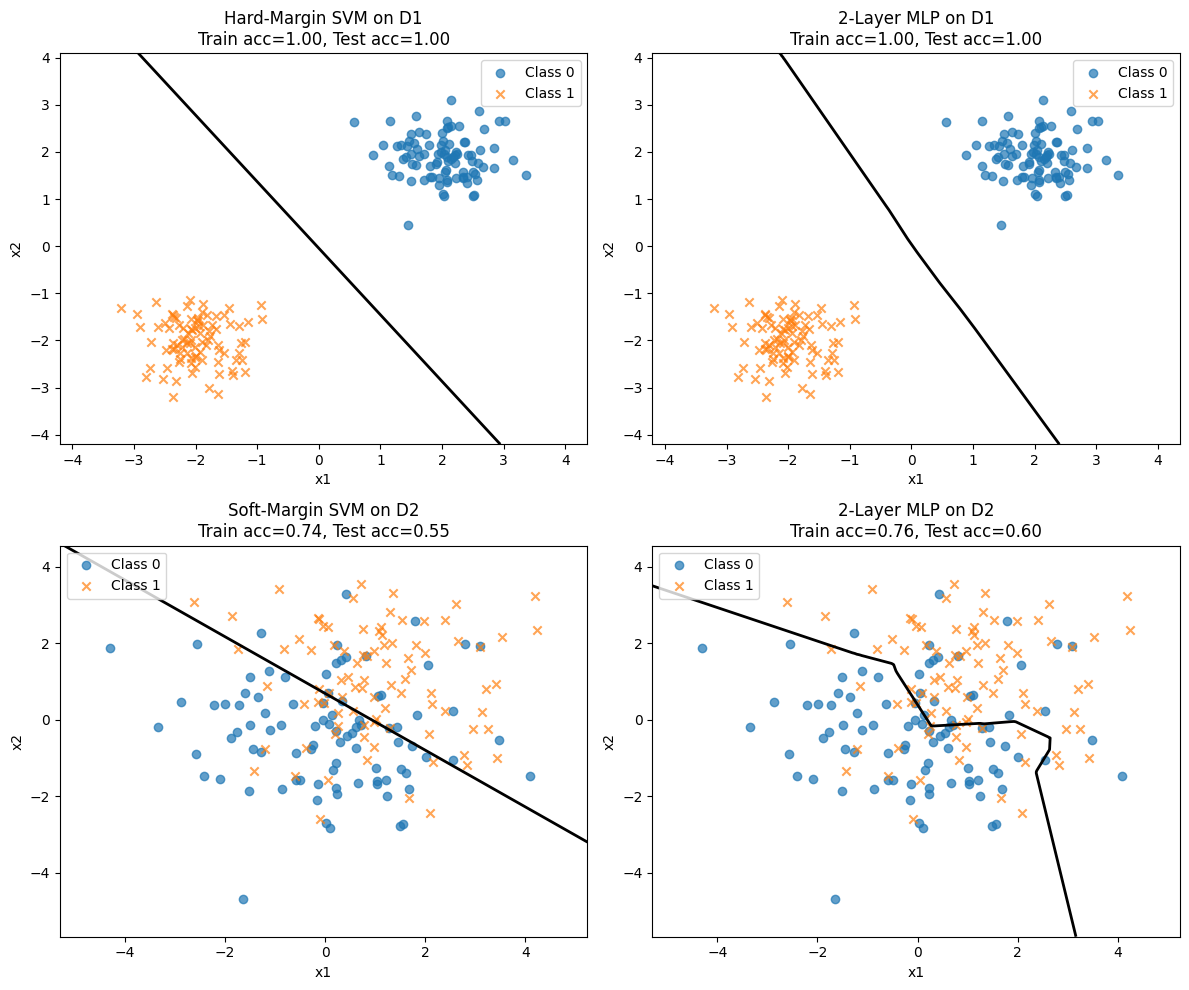

In [153]:
#Plotting the decision boundaries for both SVMs and MLPs
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

def plot_boundary(model, X, y, ax, title, train_acc, test_acc):
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
        np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
    )
    if hasattr(model, "decision_function"):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        levels = [0]
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
        levels = [0.5]
    ax.contour(xx, yy, Z, levels=levels, colors='k', linewidths=2)
    ax.scatter(X[y==0,0], X[y==0,1], label='Class 0', alpha=0.7, marker='o')
    ax.scatter(X[y==1,0], X[y==1,1], label='Class 1', alpha=0.7, marker='x')
    ax.set_title(f"{title}\nTrain acc={train_acc:.2f}, Test acc={test_acc:.2f}")
    ax.legend()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

plot_boundary(svc1, X1_train, y1_train, axes[0,0],
              "Hard-Margin SVM on D1", train_acc1, test_acc1)
plot_boundary(mlp1, X1_train, y1_train, axes[0,1],
              "2-Layer MLP on D1", train_acc_mlp1, test_acc_mlp1)
plot_boundary(svc2, X2_train, y2_train, axes[1,0],
              "Soft-Margin SVM on D2", train_acc2, test_acc2)
plot_boundary(mlp2, X2_train, y2_train, axes[1,1],
              "2-Layer MLP on D2", train_acc_mlp2, test_acc_mlp2)

plt.tight_layout()
plt.show()

In [154]:
print("Summary of Results:")
print(f"D1 SVM   → Train: {train_acc1:.2f}, Test (T1): {test_acc1:.2f}")
print(f"D1 MLP   → Train: {train_acc_mlp1:.2f}, Test (T1): {test_acc_mlp1:.2f}")
print(f"D2 SVM   → Train: {train_acc2:.2f}, Test (T2): {test_acc2:.2f}")
print(f"D2 MLP   → Train: {train_acc_mlp2:.2f}, Test (T2): {test_acc_mlp2:.2f}")

Summary of Results:
D1 SVM   → Train: 1.00, Test (T1): 1.00
D1 MLP   → Train: 1.00, Test (T1): 1.00
D2 SVM   → Train: 0.74, Test (T2): 0.55
D2 MLP   → Train: 0.76, Test (T2): 0.60


## Results Interpretation (seed = 454754)

| Dataset | Model               | Train Acc | Test Acc |
|---------|---------------------|-----------|----------|
| **D1**  | Hard-Margin SVM     | 1.00      | 1.00     |
| **D1**  | 2-Layer MLP         | 1.00      | 1.00     |
| **D2**  | Soft-Margin SVM     | 0.74      | 0.55     |
| **D2**  | 2-Layer MLP         | 0.76      | 0.60     |

**Comments:**
- **D1 (Linearly Separable)**  
  Both the SVM and the MLP perfectly classify every point on D1, achieving 100% training and test accuracy.

- **D2 (Non-Separable / Overlapping)**  
  - The **Soft-Margin SVM** underfits the overlapping data, with only 0.55 test accuracy.  
  - The **2-Layer MLP** captures a little better structure compared to SVM and reaches 0.60 test accuracy.  

The MLP’s extra flexibility lets it better distinguish the overlapped clusters on D2, even though both models still fall short of perfect separation.